In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #For plots
import pandas as pd #For Dataframes
import numpy as np #For scientific computing 

In [23]:
import keras

from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [3]:
batch_size = 256
num_classes = 26
epochs = 10

In [4]:
# Input image dimensions

img_rows, img_cols = 28, 28

In [5]:
Emnist_file_path = "C:/Users/praga/OneDrive/Documents/Rutgers/Rutgers_Misc/Additional or Extra Files/Rutgers Project 3/ShellLearn/emnist/"

In [6]:
mapping_file = Emnist_file_path + 'emnist-letters-mapping.txt'

In [7]:
with open(mapping_file, 'r') as fin: 
    mapping = fin.readlines() 

In [8]:
ascii_map = {} 
for line in mapping: 
    char_class = int(line.split()[0]) 
    letter = chr(int(line.split()[1])) 
    ascii_map[char_class] = letter

In [9]:
All_train = Emnist_file_path + 'emnist-letters-train.csv'
All_test = Emnist_file_path + 'emnist-letters-test.csv'

In [10]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [11]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [12]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(88799, 785)
(14799, 785)


In [13]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (88799, 784)
y_train shape :  (88799, 1)


In [14]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (14799, 784)
y_test shape :  (14799, 1)


In [15]:
# for conv2d
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().reshape(28, 28, 1), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().reshape(28, 28, 1), x_test)))

In [16]:
input_shape = (img_rows, img_cols, 1)

In [17]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (88799, 28, 28, 1)


In [18]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (14799, 28, 28, 1)


In [19]:
y_train = y_train - 1
y_test = y_test - 1

In [20]:
# Scale from 0 to 255
x_train /= 255
x_test /= 255

In [21]:
# Encode Categorical Integer Labels Using a One-Hot Scheme.# One-hot encode the labels
# Convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
# Set the CNN Architecture

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
# Compile the Model

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
# Compile the Model

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', #or 'adam'
#               metrics=['accuracy'])

In [26]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [27]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 4.0138%


In [28]:
# Train the model

checkpointer = ModelCheckpoint(filepath='emnist.letters.cnn.model.best.hdf5',
                               verbose=1, save_best_only=True)

In [29]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=3, shuffle=True)

Train on 71039 samples, validate on 17760 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.36510, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 2/10

Epoch 00002: val_loss improved from 0.36510 to 0.29644, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 3/10

Epoch 00003: val_loss improved from 0.29644 to 0.27156, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 4/10

Epoch 00004: val_loss improved from 0.27156 to 0.25524, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 5/10

Epoch 00005: val_loss improved from 0.25524 to 0.24617, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 6/10

Epoch 00006: val_loss improved from 0.24617 to 0.23822, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 7/10

Epoch 00007: val_loss improved from 0.23822 to 0.23011, saving model to emnist.letters.cnn.model.best.hdf5
Epoch 8/10

Epoch 00008: val_loss improved from 0.23011 to 0.22508, saving model to emnist.letters.cnn.model.best.hdf5
Ep

In [30]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('emnist.letters.cnn.model.best.hdf5')

In [31]:
# Save the best model

model.save('eminst_letters_cnn_model.h5')

In [32]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
loss = 100*score[0]

In [33]:
print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 92.0535%
Test loss: 24.9945%


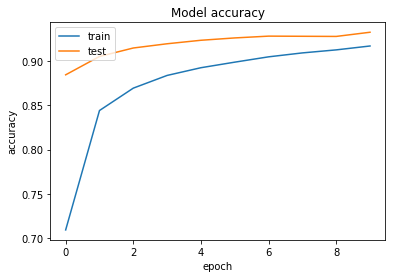

In [34]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

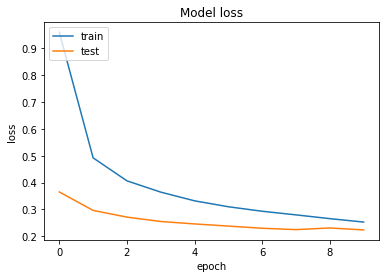

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [36]:
test = np.expand_dims(x_train[3], axis=0)
test.shape

(1, 28, 28, 1)

In [37]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0.]]
Predicted class: [22]


In [125]:
filepath = "uploads/LetterA2.png"

In [126]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [127]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape
image1 = image.reshape(1,28,28,1)

In [128]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

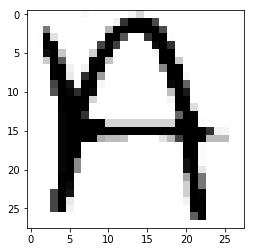

In [129]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

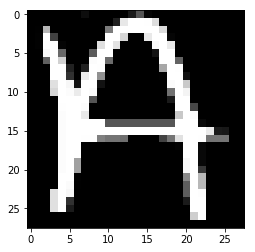

In [130]:
# # Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [131]:
# Make predictions
pred = model.predict_classes(image1)

In [132]:
pred[0]+1

1

In [133]:
pred_letter = ascii_map[pred[0]+1] 
pred_letter

'A'